# 1.设置刻度
- 显示刻度
- 解决刻度拥挤问题
- 区分刻度及刻度标签

假设一天中每隔两个小时的气温分别是[15,13,14.5,17,20,25,26,26,27,22,18,15]，绘制图形。
- 需求：设置图片x轴刻度 ->> 每隔一小时显示：[0,1,2,3,,..,23]
- 需求：设置图片x轴刻度 ->> 每隔半个小时显示：[0,0.5,1,1.5,...,23.5]
- 需求：设置图片x轴刻度 ->> 每隔半个小时显示：["0h","0.5h",1h,1.5h,...,23.5h]

In [1]:
import matplotlib.pyplot as plt

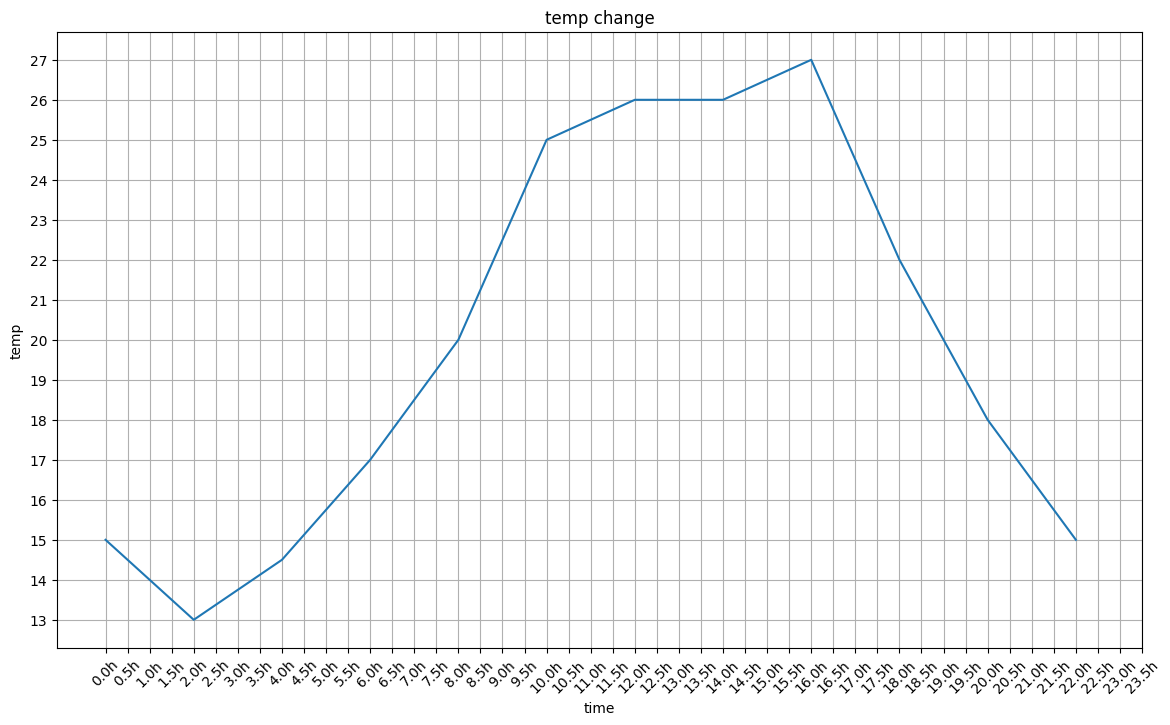

In [23]:
# 温度随着时间变化趋势 - >> 折线图
# 1.每隔两小时的数据如何展现？->> 应该是x，构建x ->> [0, 2, 4, 6,...,22]
# 1.1 注意：range函数左闭右开
x = list(range(0,24,2))
x

# 2.y=[15,13,14.5,17,20,25,26,26,27,22,18,15]
y=[15,13,14.5,17,20,25,26,26,27,22,18,15]
y

# 6.调整画布大小
plt.figure(figsize=(14,8))

# 3.绘制折线图
plt.plot(x,y)

# 4.设置x轴的刻度为：[0,1,2,3,...,23]
x_t = list(range(0,24))
plt.xticks(x_t)

# 5.设置x轴的刻度为：[0,0.5,1,1.5,...23.5]
# 5.1 注意：range，步长不能为浮点数 ->> 生成一组连续的整数列表
# list(range(0, 24, 0.5))
x_t = [i/2 for i in range(48)]
x_t
# 5.2 注意：在设置刻度时，可以加一个rotation=旋转的角度
plt.xticks(x_t,rotation=90)  #此处发现x轴刻度拥挤，可以调整画布大小

# 7.设置x轴刻度为：0h,0.5h,1.0h,...,23.5h
x_l = [f"{i/2}h" for i in range(48)]
x_l
# 7.1 ticks:刻度，数值列表  labels:刻度标签,字符串列表
plt.xticks(x_t,x_l,rotation=45)

# 8.设置y轴刻度 - >> min~max
y_t = list(range(min(y),max(y)+1))
y_t

plt.yticks(y_t)

# 9.设置x轴标签
plt.xlabel("time")

# 10.设置y轴标签
plt.ylabel("temp")

# 11.设置标题
plt.title("temp change")

# 12.网格图
plt.grid()

# 13.保存图片
# plt.savvefig("tem.jpg")
# 注意：保存图片只在plt.show()之前 ->> 没有释放之前

plt.show()

### 2.中文显示问题
如果列表a表示10点到12点的每一分钟的气温,如何绘制折线图观察每分钟气温的变化情况

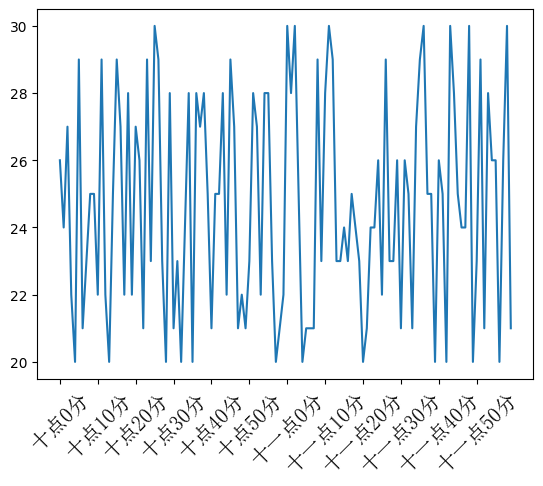

In [38]:
import random
import matplotlib.pyplot as plt
# 注意：为什么matplotlib/searbon无法显示中文呢？->> 因为matplotlib的自带字体库不支持中文
# 方法一：给matplotlib添加支持的字体 ->> 针对与本.ipynb文件临时的设置 
# font = {
#     "family":"SimHei",
#     "weight":"bold",
#     "size":12
# }
# matplotlib.rc("font", **font)

# 方法二：通过pyplot的字典rcParams设置参数 ->> 针对与本.ipynb文件临时的设置 
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
# plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

# 方法三：设置自定义字体(局部) ->> 只对相应设置的方法有效 ->> 针对性
from matplotlib.font_manager import FontProperties
# 相当于将windows自带的字体注入到matplotlib字体库
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=15)

# 1.构建数据。 x ->>10-12点每分钟  120分钟  [0...119]
x = list(range(120))
len(x)

# 2.a表示每一分钟的气温 ->> 随机生成
# 随机从[20,30]区间内生成1个整数 
y = [random.randint(20,30) for i in range(120)]
len(y)

# 3.绘制折线图
plt.plot(x,y)

# 4.设置x轴刻度：十点0分 十点10分 ..十点50 十一点0分 十一点10分 ..十一点50分
# 刻度
x_t = list(range(0,120,10))
# 刻度标签
x_l = [f"十点{i}分" for i in range(0,60,10)]
x_l += [f"十一点{i}分" for i in range(0,60,10)]
# plt.xticks(x_l)  报错
plt.xticks(x_t,x_l,rotation=45,fontproperties=font)

plt.show()

### 3.给数据点添加文本注释

In [40]:
li = [random.randint(10,20) for i in range(10)]

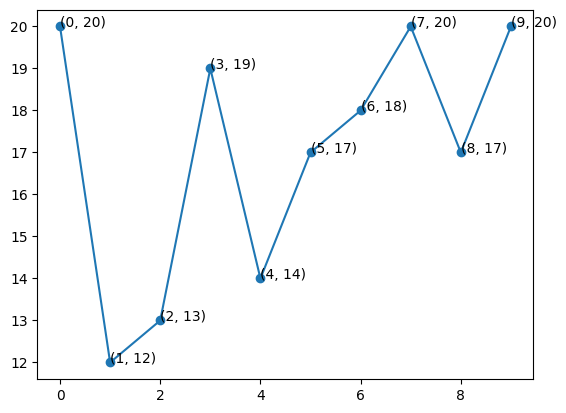

In [54]:
# 1.构建数据
y = li
# 1.1生成一组连续的整数列表
x = list(range(10))

# 2.可视化
plt.plot(x,y,marker="o")

# 3.问题：怎么给图形添加文本注释呢？ ->> plt.annotate
# text:注释的文本
# xy:是需要被注释的点的坐标
# xytext:注释文本所在的坐标
# plt.annotate("(0,16)", xy=(0,16), xytext=(0,16))
# plt.annotate("(0,16)", xy=(0,16), xytext=(0,16))

# 4.给所有的数据点添加注释文本
for x_i,y_i in list(zip(x,y)):
    plt.annotate(f"{(x_i, y_i)}", xy=(x_i,y_i), xytext=(x_i,y_i))

In [53]:
print(list(zip(x,y)))

[(0, 20), (1, 12), (2, 13), (3, 19), (4, 14), (5, 17), (6, 18), (7, 20), (8, 17), (9, 20)]


### 总结
#### 使用到的函数
- x,y轴刻度  plt.xticks(x_t,x_l,rotation=,fontproperties=font)  plt.yticks()  x_t刻度值 x_l刻度标签 rotation刻度旋转度数 fontproperties字体
- x,y轴标签  plt.xlabel()  plt.ylabel()
- 图表标题   plt.title()
- 图表网格化  plt.grid()
- 保存图片  plt.savefig("name.jpg")
- 添加注释 plt.annotate(text="",xy=(),textxy())